In [2]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import os
import seaborn as sns
import anndata as ad
import scanpy as sc

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.5 scipy==1.8.0 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.7


In [4]:
results_file = './Puram/Puram_scanpy.h5ad'  # the file that will store the analysis results

In [6]:
Puram_tpm_ann = sc.read_h5ad('./Puram/Puram_scanpy.h5ad')
adata.uns['log1p']["base"] = None
Puram_tpm_ann

AnnData object with n_obs × n_vars = 5902 × 3865
    obs: 'Cell_type', 'n_genes'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Cell_type_colors', 'hvg', 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

Ei,j=log2(TPMi,j/10+1)
### transform Puram to TPM


In [50]:
df_Puram = pd.read_csv("/home/cke/Puram/HNSCC2PuramGSE103322_HNSCC_exp.tsv",sep='\t',index_col='X')

In [51]:
df_Puram

HN28_P15_D06_S330_comb  HN28_P6_G05_S173_comb  \
X                                                                
ENSG00000121410                0.000000                0.00000   
ENSG00000268895                0.000000                0.00000   
ENSG00000148584                0.000000                0.00000   
ENSG00000175899                9.683000                7.58300   
ENSG00000245105                0.176320                0.00000   
...                                 ...                    ...   
ENSG00000203995                0.163500                0.27977   
ENSG00000162378                0.090853                3.93480   
ENSG00000159840                4.274800                0.00000   
ENSG00000074755                0.000000                3.77160   
ENSG00000036549                0.000000                0.00000   

                 HN26_P14_D11_S239_comb  HN26_P14_H05_S281_comb  \
X                                                                 
ENSG00000121410                0.000000                 0.00000   
ENSG00000268895                0.000000                 0.00000   
ENSG00000148584                0.000000                 0.00000   
ENSG00000175899                0.029983                 6.05470   
ENSG00000245105                0.000000                 0.00000   
...                                 ...                     ...   
ENSG00000203995                0.000000                 0.18650   
ENSG00000162378                0.073135                 0.21412   
ENSG00000159840                0.000000                 0.12433   
ENSG00000074755                1.304500                 0.09356   
ENSG00000036549                2.112000                 0.00000   

                 HN26_P25_H09_S189_comb  HN26_P14_H06_S282_comb  \
X                                                                 
ENSG00000121410                 0.00000                0.066261   
ENSG00000268895                 0.00000                0.000000   
ENSG00000148584                 0.00000                0.000000   
ENSG00000175899                 0.00000                0.000000   
ENSG00000245105                 0.00000                0.000000   
...                                 ...                     ...   
ENSG00000203995                 0.13356                0.063503   
ENSG00000162378                 2.90590                0.051024   
ENSG00000159840                 3.00340                0.605020   
ENSG00000074755                 0.00000                0.000000   
ENSG00000036549                 0.00000                0.000000   

                 HN25_P25_C04_S316_comb  HN26_P25_A11_S107_comb  \
X                                                                 
ENSG00000121410                 0.00000                0.541020   
ENSG00000268895                 0.00000                0.000000   
ENSG00000148584                 0.00000                0.000000   
ENSG00000175899                 0.19661                7.706000   
ENSG00000245105                 0.00000                0.000000   
...                                 ...                     ...   
ENSG00000203995                 1.08810                0.067639   
ENSG00000162378                 0.85599                0.000000   
ENSG00000159840                 0.00000                5.292800   
ENSG00000074755                 0.85679                0.000000   
ENSG00000036549                 0.00000                0.000000   

                 HN26_P25_C09_S129_comb  HNSCC26_P24_H05_S377_comb  ...  \
X                                                                   ...   
ENSG00000121410                0.000000                    1.30040  ...   
ENSG00000268895                0.000000                    0.00000  ...   
ENSG00000148584                0.000000                    0.00000  ...   
ENSG00000175899                0.000000                    0.00000  ...   
ENSG00000245105                0.000000                    2.61920  ...   
...              

In [53]:
df_Puram_tpm = (np.exp2(df_Puram)-1)*10
df_Puram_tpmgei

HN28_P15_D06_S330_comb  HN28_P6_G05_S173_comb  \
X                                                                
ENSG00000121410                0.000000               0.000000   
ENSG00000268895                0.000000               0.000000   
ENSG00000148584                0.000000               0.000000   
ENSG00000175899             8210.030860            1907.389996   
ENSG00000245105                1.299978               0.000000   
...                                 ...                    ...   
ENSG00000203995                1.200010               2.140013   
ENSG00000162378                0.649997             142.930049   
ENSG00000159840              183.572218               0.000000   
ENSG00000074755                0.000000             126.572963   
ENSG00000036549                0.000000               0.000000   

                 HN26_P14_D11_S239_comb  HN26_P14_H05_S281_comb  \
X                                                                 
ENSG00000121410                0.000000                0.000000   
ENSG00000268895                0.000000                0.000000   
ENSG00000148584                0.000000                0.000000   
ENSG00000175899                0.210001              654.731585   
ENSG00000245105                0.000000                0.000000   
...                                 ...                     ...   
ENSG00000203995                0.000000                1.379996   
ENSG00000162378                0.520002                1.599961   
ENSG00000159840                0.000000                0.900014   
ENSG00000074755               14.699811                0.669999   
ENSG00000036549               33.229016                0.000000   

                 HN26_P25_H09_S189_comb  HN26_P14_H06_S282_comb  \
X                                                                 
ENSG00000121410                0.000000                0.469997   
ENSG00000268895                0.000000                0.000000   
ENSG00000148584                0.000000                0.000000   
ENSG00000175899                0.000000                0.000000   
ENSG00000245105                0.000000                0.000000   
...                                 ...                     ...   
ENSG00000203995                0.969973                0.450000   
ENSG00000162378               64.948521                0.360000   
ENSG00000159840               70.188758                5.209998   
ENSG00000074755                0.000000                0.000000   
ENSG00000036549                0.000000                0.000000   

                 HN25_P25_C04_S316_comb  HN26_P25_A11_S107_comb  \
X                                                                 
ENSG00000121410                0.000000                4.550009   
ENSG00000268895                0.000000                0.000000   
ENSG00000148584                0.000000                0.000000   
ENSG00000175899                1.460023             2078.031983   
ENSG00000245105                0.000000                0.000000   
...                                 ...                     ...   
ENSG00000203995               11.259387                0.480002   
ENSG00000162378                8.100004                0.000000   
ENSG00000159840                0.000000              382.004959   
ENSG00000074755                8.110043                0.000000   
ENSG00000036549                0.000000                0.000000   

                 HN26_P25_C09_S129_comb  HNSCC26_P24_H05_S377_comb  ...  \
X                                                                   ...   
ENSG00000121410                0.000000                  14.629716  ...   
ENSG00000268895                0.000000                   0.000000  ...   
ENSG00000148584                0.000000                   0.000000  ...   
ENSG00000175899                0.000000                   0.000000  ...   
ENSG00000245105                0.000000                  51.440928  ...   
...              

In [57]:
df_Puram_tpm['exp level'] = np.log2(df_Puram_tpm.apply(np.mean,1)+1)

In [7]:
# df_Puram_tpm.drop('exp level',axis=1,inplace=True)

In [9]:
df_Puram_tpm.to_csv("/home/cke/Puram/HNSCC2PuramGSE103322_HNSCC_exp_TPM.tsv",sep='\t')

In [58]:
# read in tpm Puram counts
df_Puram_tpm = pd.read_csv("/home/cke/Puram/HNSCC2PuramGSE103322_HNSCC_exp_TPM.tsv",sep='\t',index_col=0)

In [8]:
df_Puram_tpm

HN28_P15_D06_S330_comb  HN28_P6_G05_S173_comb  \
X                                                                
ENSG00000121410                0.000000               0.000000   
ENSG00000268895                0.000000               0.000000   
ENSG00000148584                0.000000               0.000000   
ENSG00000175899             8210.030860            1907.389996   
ENSG00000245105                1.299978               0.000000   
...                                 ...                    ...   
ENSG00000203995                1.200010               2.140013   
ENSG00000162378                0.649997             142.930049   
ENSG00000159840              183.572218               0.000000   
ENSG00000074755                0.000000             126.572963   
ENSG00000036549                0.000000               0.000000   

                 HN26_P14_D11_S239_comb  HN26_P14_H05_S281_comb  \
X                                                                 
ENSG00000121410                0.000000                0.000000   
ENSG00000268895                0.000000                0.000000   
ENSG00000148584                0.000000                0.000000   
ENSG00000175899                0.210001              654.731585   
ENSG00000245105                0.000000                0.000000   
...                                 ...                     ...   
ENSG00000203995                0.000000                1.379996   
ENSG00000162378                0.520002                1.599961   
ENSG00000159840                0.000000                0.900014   
ENSG00000074755               14.699811                0.669999   
ENSG00000036549               33.229016                0.000000   

                 HN26_P25_H09_S189_comb  HN26_P14_H06_S282_comb  \
X                                                                 
ENSG00000121410                0.000000                0.469997   
ENSG00000268895                0.000000                0.000000   
ENSG00000148584                0.000000                0.000000   
ENSG00000175899                0.000000                0.000000   
ENSG00000245105                0.000000                0.000000   
...                                 ...                     ...   
ENSG00000203995                0.969973                0.450000   
ENSG00000162378               64.948521                0.360000   
ENSG00000159840               70.188758                5.209998   
ENSG00000074755                0.000000                0.000000   
ENSG00000036549                0.000000                0.000000   

                 HN25_P25_C04_S316_comb  HN26_P25_A11_S107_comb  \
X                                                                 
ENSG00000121410                0.000000                4.550009   
ENSG00000268895                0.000000                0.000000   
ENSG00000148584                0.000000                0.000000   
ENSG00000175899                1.460023             2078.031983   
ENSG00000245105                0.000000                0.000000   
...                                 ...                     ...   
ENSG00000203995               11.259387                0.480002   
ENSG00000162378                8.100004                0.000000   
ENSG00000159840                0.000000              382.004959   
ENSG00000074755                8.110043                0.000000   
ENSG00000036549                0.000000                0.000000   

                 HN26_P25_C09_S129_comb  HNSCC26_P24_H05_S377_comb  ...  \
X                                                                   ...   
ENSG00000121410                0.000000                  14.629716  ...   
ENSG00000268895                0.000000                   0.000000  ...   
ENSG00000148584                0.000000                   0.000000  ...   
ENSG00000175899                0.000000                   0.000000  ...   
ENSG00000245105                0.000000                  51.440928  ...   
...              

In [13]:
# gene expression level <4 were exluded in Puram paper
# We used the remaining cells (k=5,902) to identify genes that are expressed at high or intermediate levels 
# by calculating the aggregate expression of each gene i across the k cells, as Ea(i)=log2(average(TPM(i)1...k)+1), and excluded genes with Ea<4. 
(df_Puram_tpm['exp level']<4).sum()

14604

## Scanpy workflow as tutorial 

In [14]:
df_Puram_filtered_tpm = df_Puram_tpm[df_Puram_tpm['exp level'] >= 4].drop(['exp level'],axis=1)
df_Puram_filtered_tpm

HN28_P15_D06_S330_comb  HN28_P6_G05_S173_comb  \
X                                                                
ENSG00000175899             8210.030860            1907.389996   
ENSG00000128274               37.528735               0.000000   
ENSG00000094914              223.006775             248.483449   
ENSG00000081760              108.277193               0.000000   
ENSG00000103591                0.000000               8.860004   
...                                 ...                    ...   
ENSG00000086827                0.000000               0.000000   
ENSG00000174442                0.000000               0.000000   
ENSG00000122952                0.000000               0.000000   
ENSG00000159840              183.572218               0.000000   
ENSG00000036549                0.000000               0.000000   

                 HN26_P14_D11_S239_comb  HN26_P14_H05_S281_comb  \
X                                                                 
ENSG00000175899                0.210001              654.731585   
ENSG00000128274                0.000000                2.010032   
ENSG00000094914                0.000000                0.000000   
ENSG00000081760                0.000000                0.000000   
ENSG00000103591               50.729606                0.000000   
...                                 ...                     ...   
ENSG00000086827                0.000000                0.000000   
ENSG00000174442                0.000000                0.000000   
ENSG00000122952                0.000000                0.000000   
ENSG00000159840                0.000000                0.900014   
ENSG00000036549               33.229016                0.000000   

                 HN26_P25_H09_S189_comb  HN26_P14_H06_S282_comb  \
X                                                                 
ENSG00000175899                0.000000                0.000000   
ENSG00000128274                0.000000                0.000000   
ENSG00000094914              264.455434               77.089573   
ENSG00000081760                9.459977                3.030026   
ENSG00000103591                0.000000               55.809689   
...                                 ...                     ...   
ENSG00000086827                0.000000               30.479739   
ENSG00000174442                0.000000                8.299954   
ENSG00000122952                0.000000                0.000000   
ENSG00000159840               70.188758                5.209998   
ENSG00000036549                0.000000                0.000000   

                 HN25_P25_C04_S316_comb  HN26_P25_A11_S107_comb  \
X                                                                 
ENSG00000175899                1.460023             2078.031983   
ENSG00000128274                0.000000                0.000000   
ENSG00000094914              405.391560              165.135543   
ENSG00000081760              556.105879                0.000000   
ENSG00000103591                0.000000               86.839793   
...                                 ...                     ...   
ENSG00000086827                0.000000              175.892930   
ENSG00000174442                0.000000              238.435597   
ENSG00000122952                0.000000                0.000000   
ENSG00000159840                0.000000              382.004959   
ENSG00000036549                0.000000                0.000000   

                 HN26_P25_C09_S129_comb  HNSCC26_P24_H05_S377_comb  ...  \
X                                                                   ...   
ENSG00000175899                     0.0                   0.000000  ...   
ENSG00000128274                     0.0                   0.000000  ...   
ENSG00000094914                     0.0                   0.000000  ...   
ENSG00000081760                     0.0                   0.000000  ...   
ENSG00000103591                     0.0                 130.909795  ...   
...              

In [31]:
# to do: remove patient MEEI5 as Puram deconv paper did
# T-cell subtypes were anootated based Differential expression of T-cell markers in Puram deconv paper

In [5]:
# read in tpm Puram counts
df_Puram_tpm = pd.read_csv("/home/cke/Puram/HNSCC2PuramGSE103322_HNSCC_exp_TPM.tsv",sep='\t',index_col=0)

In [60]:
Puram_tpm_ann = ad.AnnData(df_Puram_tpm.drop(['exp level'],axis=1).transpose())

/tmp/ipykernel_6972/544152364.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  Puram_tpm_ann = ad.AnnData(df_Puram_tpm.drop(['exp level'],axis=1).transpose())


In [62]:
Puram_tpm_ann.obs_names = df_Puram_tpm.columns.tolist()[:-1]
Puram_tpm_ann.var_names = df_Puram_tpm.index.tolist()

In [63]:
celltype_label_Puram = pd.read_csv("./Puram/PuramHNSCC_cell_category_mappedCelltypes_simple.csv",index_col=0) 
# celltype_label_Puram
Puram_tpm_ann.obs['Cell_type'] = celltype_label_Puram['cell_category'].astype("category")

In [64]:
Puram_tpm_ann.var['gene_ids'] = df_Puram_tpm.index.tolist()

In [65]:
Puram_tpm_ann.var

gene_ids
ENSG00000121410  ENSG00000121410
ENSG00000268895  ENSG00000268895
ENSG00000148584  ENSG00000148584
ENSG00000175899  ENSG00000175899
ENSG00000245105  ENSG00000245105
...                          ...
ENSG00000203995  ENSG00000203995
ENSG00000162378  ENSG00000162378
ENSG00000159840  ENSG00000159840
ENSG00000074755  ENSG00000074755
ENSG00000036549  ENSG00000036549

[21813 rows x 1 columns]

In [72]:
Puram_tpm_ann

AnnData object with n_obs × n_vars = 5902 × 19893
    obs: 'Cell_type', 'n_genes'
    var: 'gene_ids', 'n_cells'
    uns: 'log1p'

normalizing counts per cell
    finished (0:00:00)


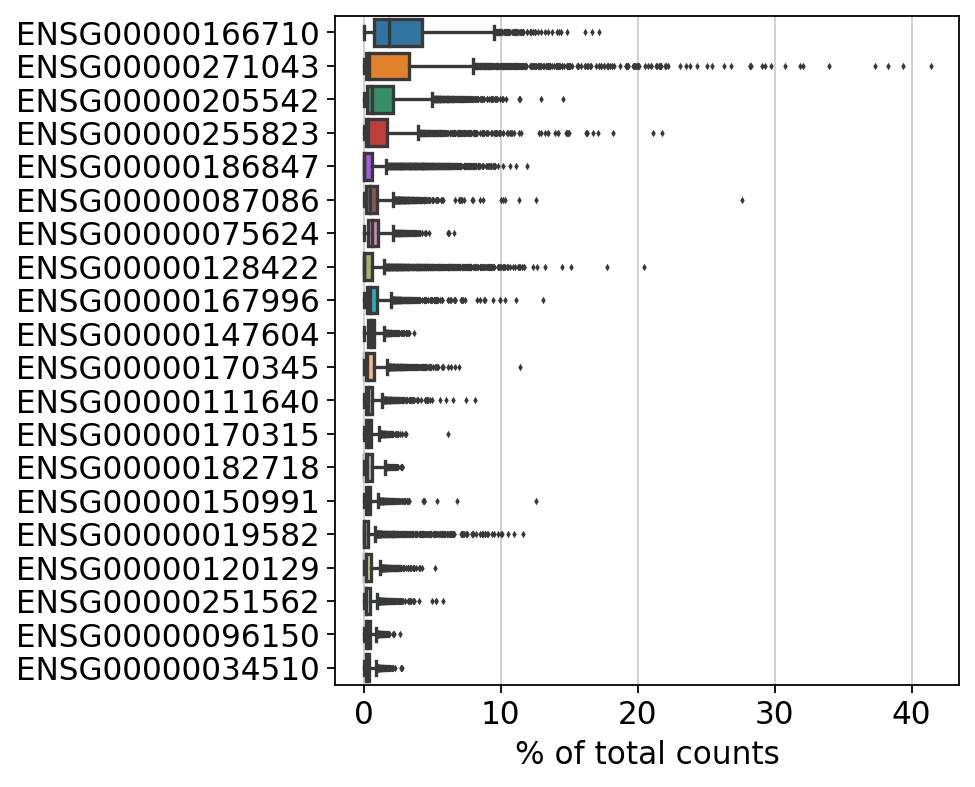

In [67]:
# Show those genes that yield the highest fraction of counts in each single cell, across all cells.
sc.pl.highest_expr_genes(Puram_tpm_ann, n_top=20)

In [68]:
# basic filtering
sc.pp.filter_cells(Puram_tpm_ann, min_genes=200)
sc.pp.filter_genes(Puram_tpm_ann, min_cells=3)

filtered out 1920 genes that are detected in less than 3 cells


In [69]:
# Logarithmize the data 
sc.pp.log1p(Puram_tpm_ann)

In [73]:
# Identify highly-variable genes.
# 3865 highly variable genes identified
sc.pp.highly_variable_genes(Puram_tpm_ann, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [74]:
Puram_tpm_ann.var[Puram_tpm_ann.var['highly_variable']==True]

gene_ids  n_cells  highly_variable     means  \
ENSG00000245105  ENSG00000245105      164             True  1.184314   
ENSG00000166535  ENSG00000166535     1411             True  2.482604   
ENSG00000256069  ENSG00000256069       18             True  0.525836   
ENSG00000114771  ENSG00000114771       50             True  0.670839   
ENSG00000197953  ENSG00000197953       36             True  0.392967   
...                          ...      ...              ...       ...   
ENSG00000197062  ENSG00000197062      535             True  2.908891   
ENSG00000180532  ENSG00000180532      189             True  0.569283   
ENSG00000137185  ENSG00000137185      235             True  1.941347   
ENSG00000132801  ENSG00000132801       88             True  1.076538   
ENSG00000272589  ENSG00000272589      186             True  1.375280   

                 dispersions  dispersions_norm  
ENSG00000245105     6.337306          0.872320  
ENSG00000166535     6.993021          1.686216  
ENSG00000256069     6.570683          1.047355  
ENSG00000114771     6.242286          0.750286  
ENSG00000197953     6.672487          1.588121  
...                      ...               ...  
ENSG00000197062     6.439639          0.789720  
ENSG00000180532     6.891183          1.337281  
ENSG00000137185     6.220721          0.680467  
ENSG00000132801     6.242218          0.770276  
ENSG00000272589     6.286037          0.817301  

[3865 rows x 6 columns]

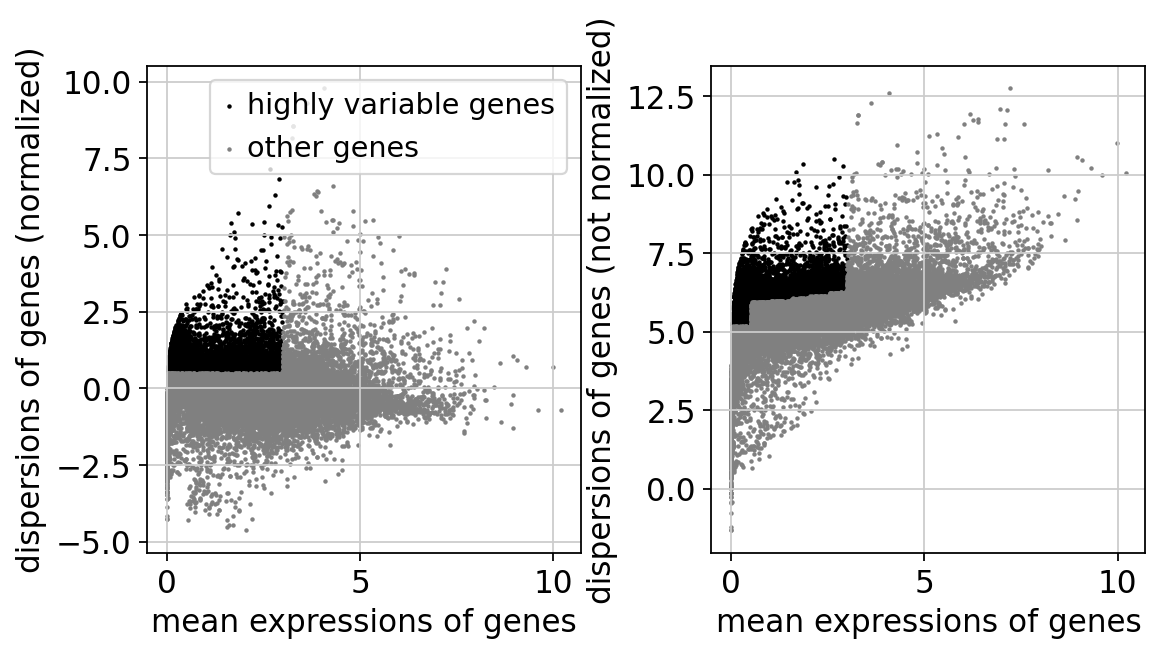

In [75]:
sc.pl.highly_variable_genes(Puram_tpm_ann)

In [76]:
#Actually do the filtering by hvg
Puram_tpm_ann.raw = Puram_tpm_ann

In [77]:
Puram_tpm_ann = Puram_tpm_ann[:,Puram_tpm_ann.var.highly_variable]

In [78]:
#Scale each gene to unit variance. Clip values exceeding standard deviation 10.
sc.pp.scale(Puram_tpm_ann, max_value=10)

/home/cke/miniconda3/envs/BLADE/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [79]:
sc.tl.pca(Puram_tpm_ann, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)


In [86]:
Puram_tpm_ann

AnnData object with n_obs × n_vars = 5902 × 3865
    obs: 'Cell_type', 'n_genes', 'leiden'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'Cell_type_colors', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

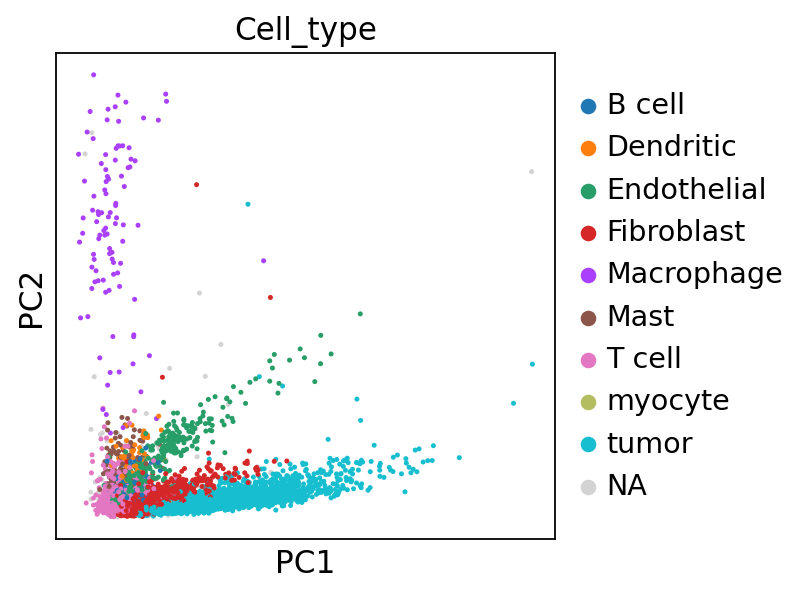

In [87]:
sc.pl.pca(Puram_tpm_ann,color='Cell_type')

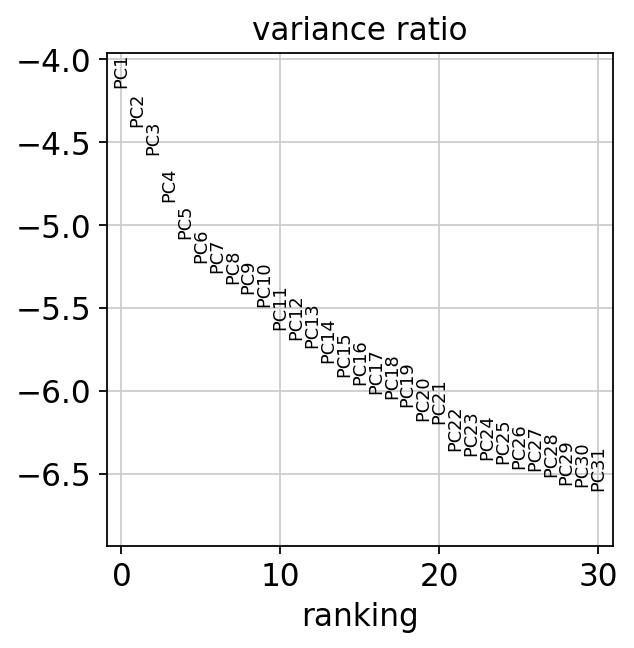

In [88]:
#inspect the contribution of single PCs to the total variance in the data
sc.pl.pca_variance_ratio(Puram_tpm_ann, log=True)

In [89]:
#compute the neighborhood graph of cells using the PCA representation of the data matrix.
sc.pp.neighbors(Puram_tpm_ann, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


In [90]:
# might still observe disconnected clusters and similar connectivity violations.
# They can usually be remedied by running:
sc.tl.leiden(Puram_tpm_ann)
sc.tl.paga(Puram_tpm_ann)
sc.pl.paga(Puram_tpm_ann, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(Puram_tpm_ann, init_pos='paga')

running Leiden clustering
    finished: found 29 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


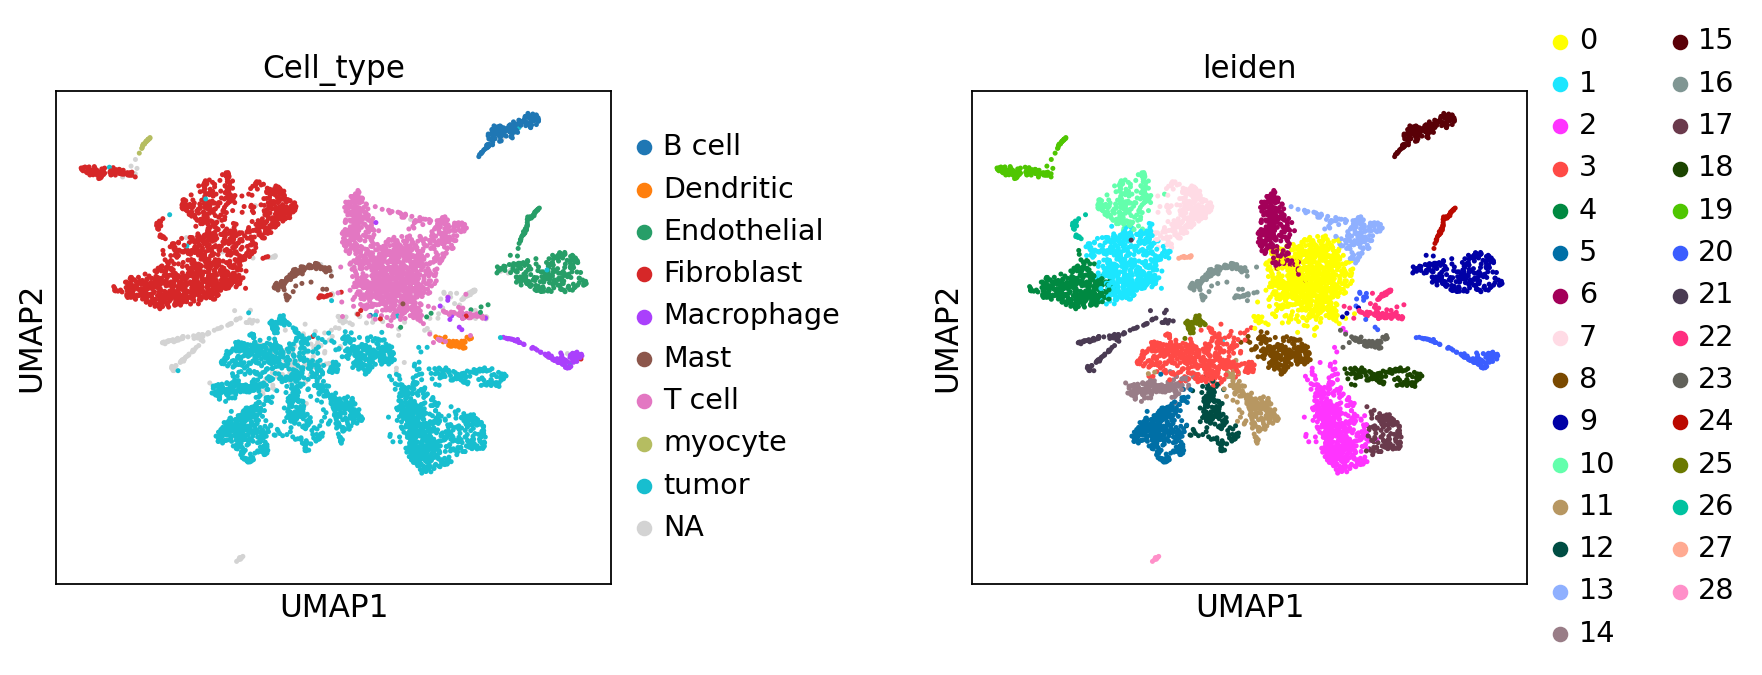

In [91]:
# embedding the graph in two dimensions using UMAP
# sc.tl.umap(Puram_tpm_ann)
sc.pl.umap(Puram_tpm_ann, color=['Cell_type','leiden'],use_raw=False,wspace=0.5)

ranking genes


/home/cke/miniconda3/envs/BLADE/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/cke/miniconda3/envs/BLADE/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/cke/miniconda3/envs/BLADE/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarni

/home/cke/miniconda3/envs/BLADE/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/cke/miniconda3/envs/BLADE/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals'] = pvals[global_indices]
/home/cke/miniconda3/envs/BLADE/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:409: PerformanceWarning: DataF

    finished (0:00:24)


/home/cke/miniconda3/envs/BLADE/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/cke/miniconda3/envs/BLADE/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals'] = pvals[global_indices]
/home/cke/miniconda3/envs/BLADE/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:409: PerformanceWarning: DataF

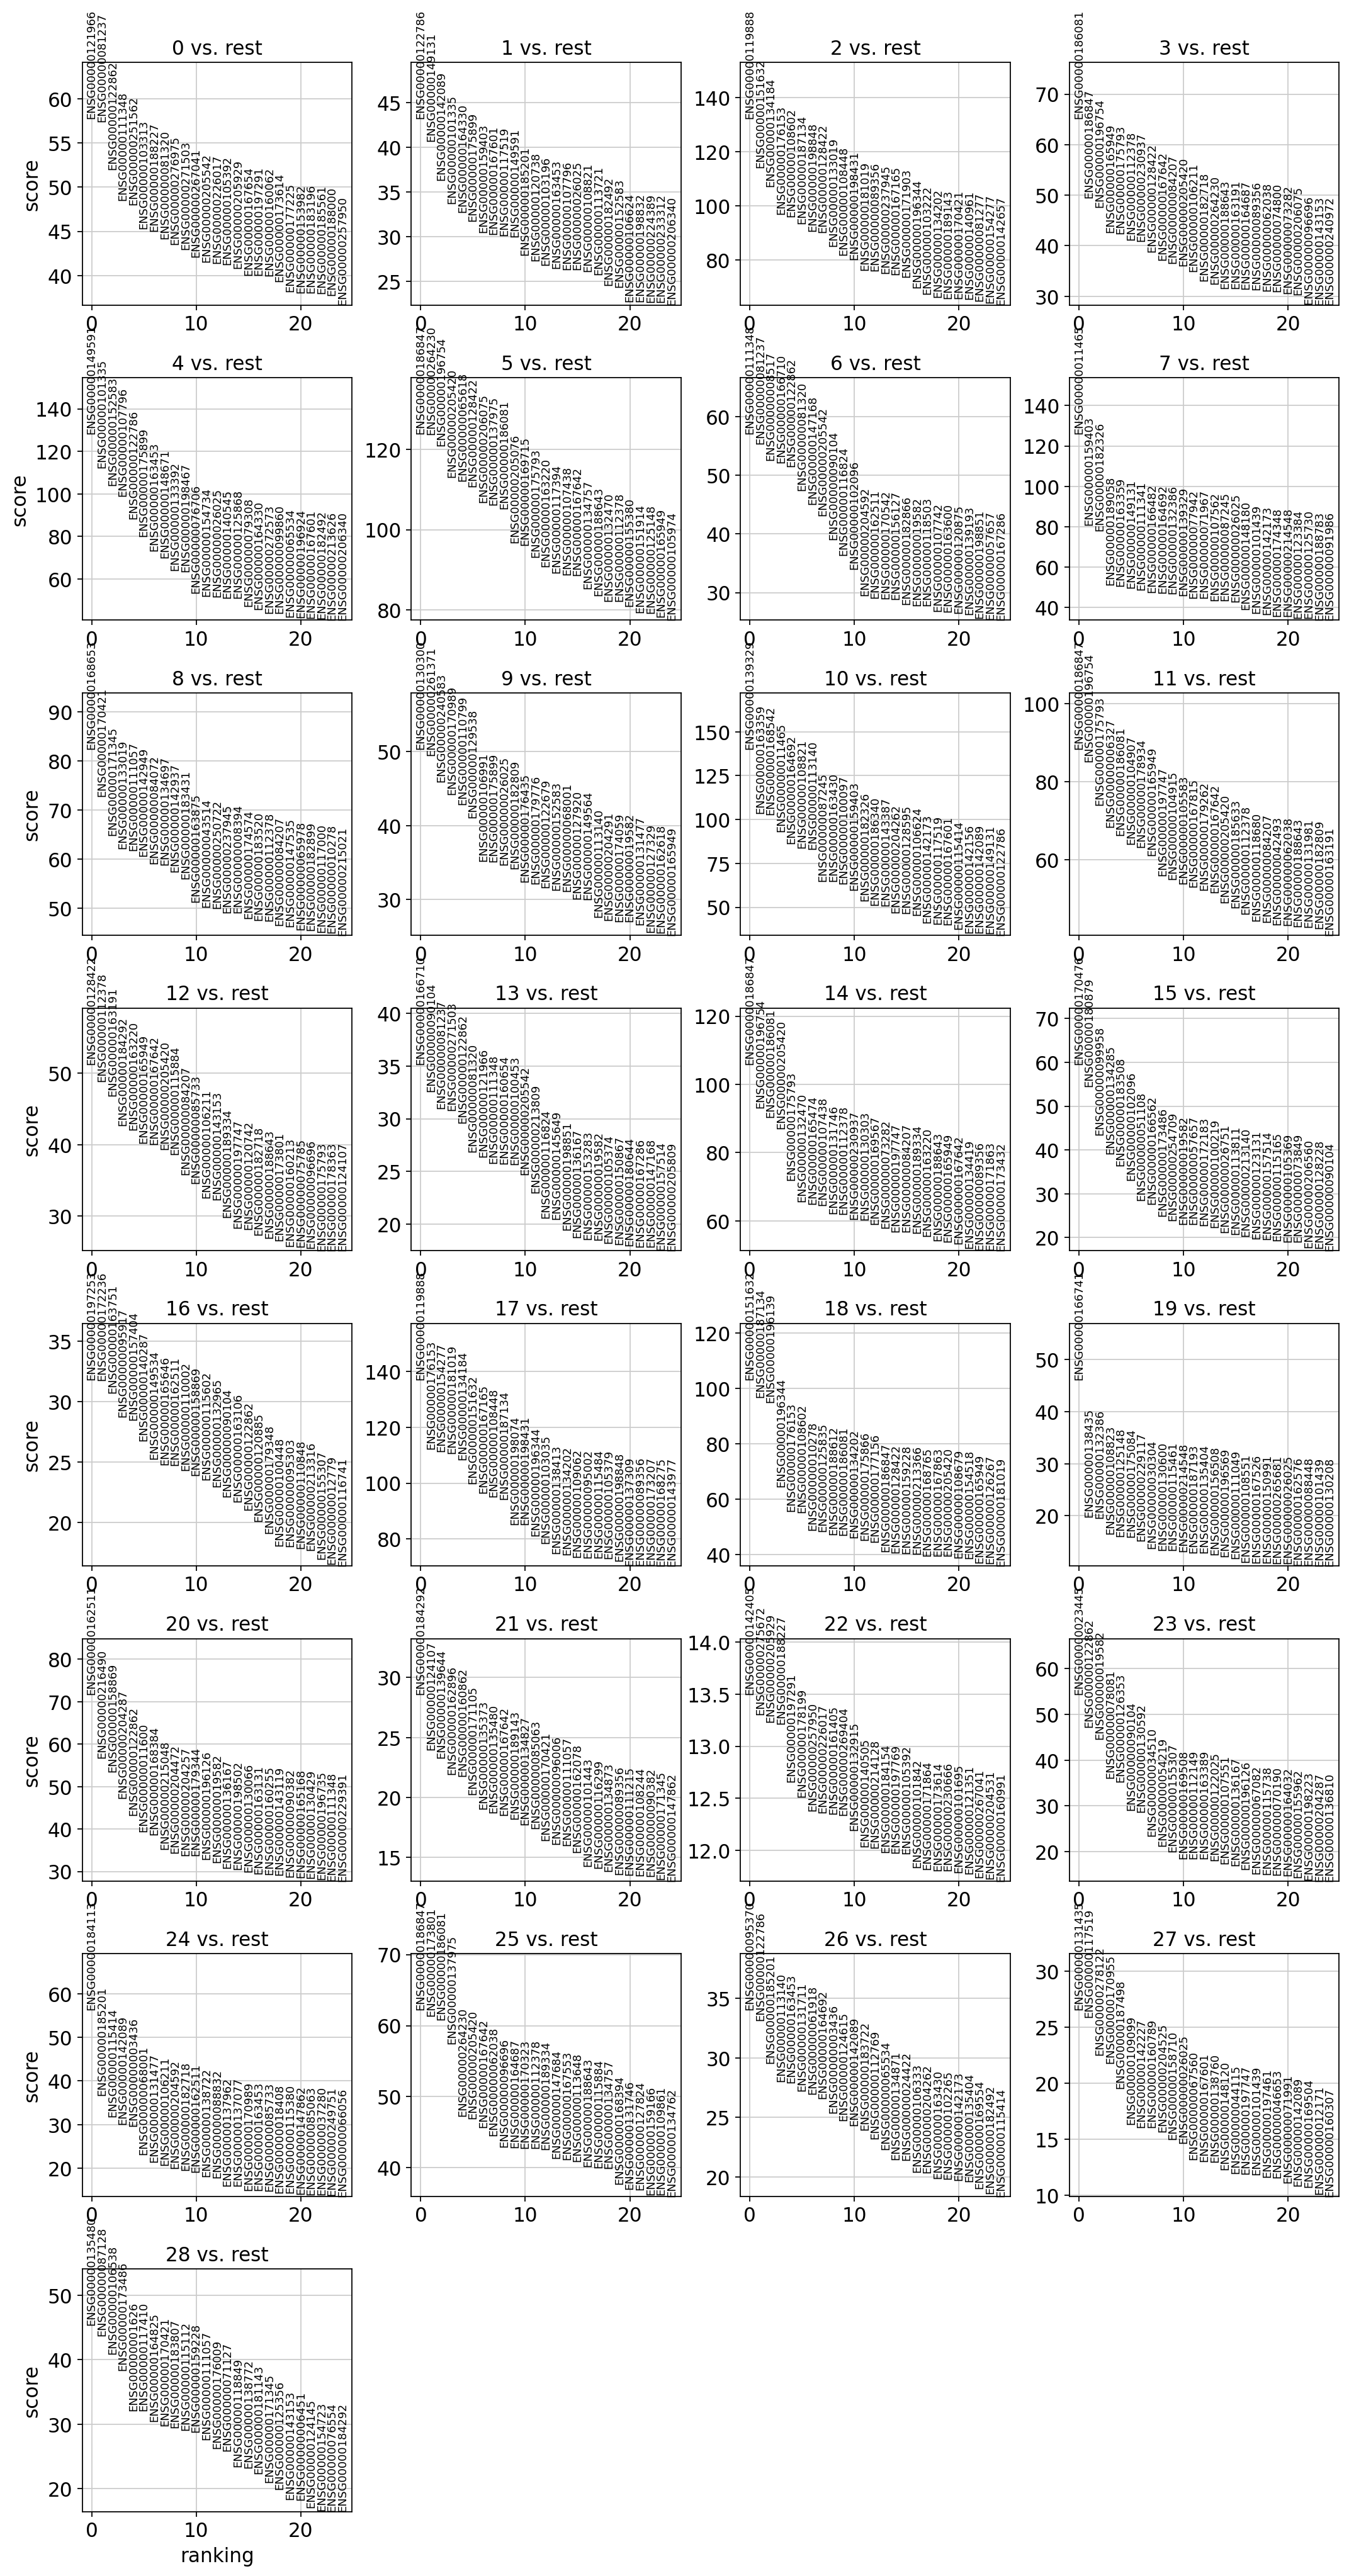

In [93]:
"""
Finding marker genes
compute a ranking for the highly differential genes in each cluster
t-test
each rank genes run overwrites existing run!
"""
sc.settings.verbosity = 2  # reduce the verbosity

sc.tl.rank_genes_groups(Puram_tpm_ann, 'leiden', method='t-test')
sc.pl.rank_genes_groups(Puram_tpm_ann, n_genes=25, sharey=False)


ranking genes


/home/cke/miniconda3/envs/BLADE/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


    finished (0:00:43)


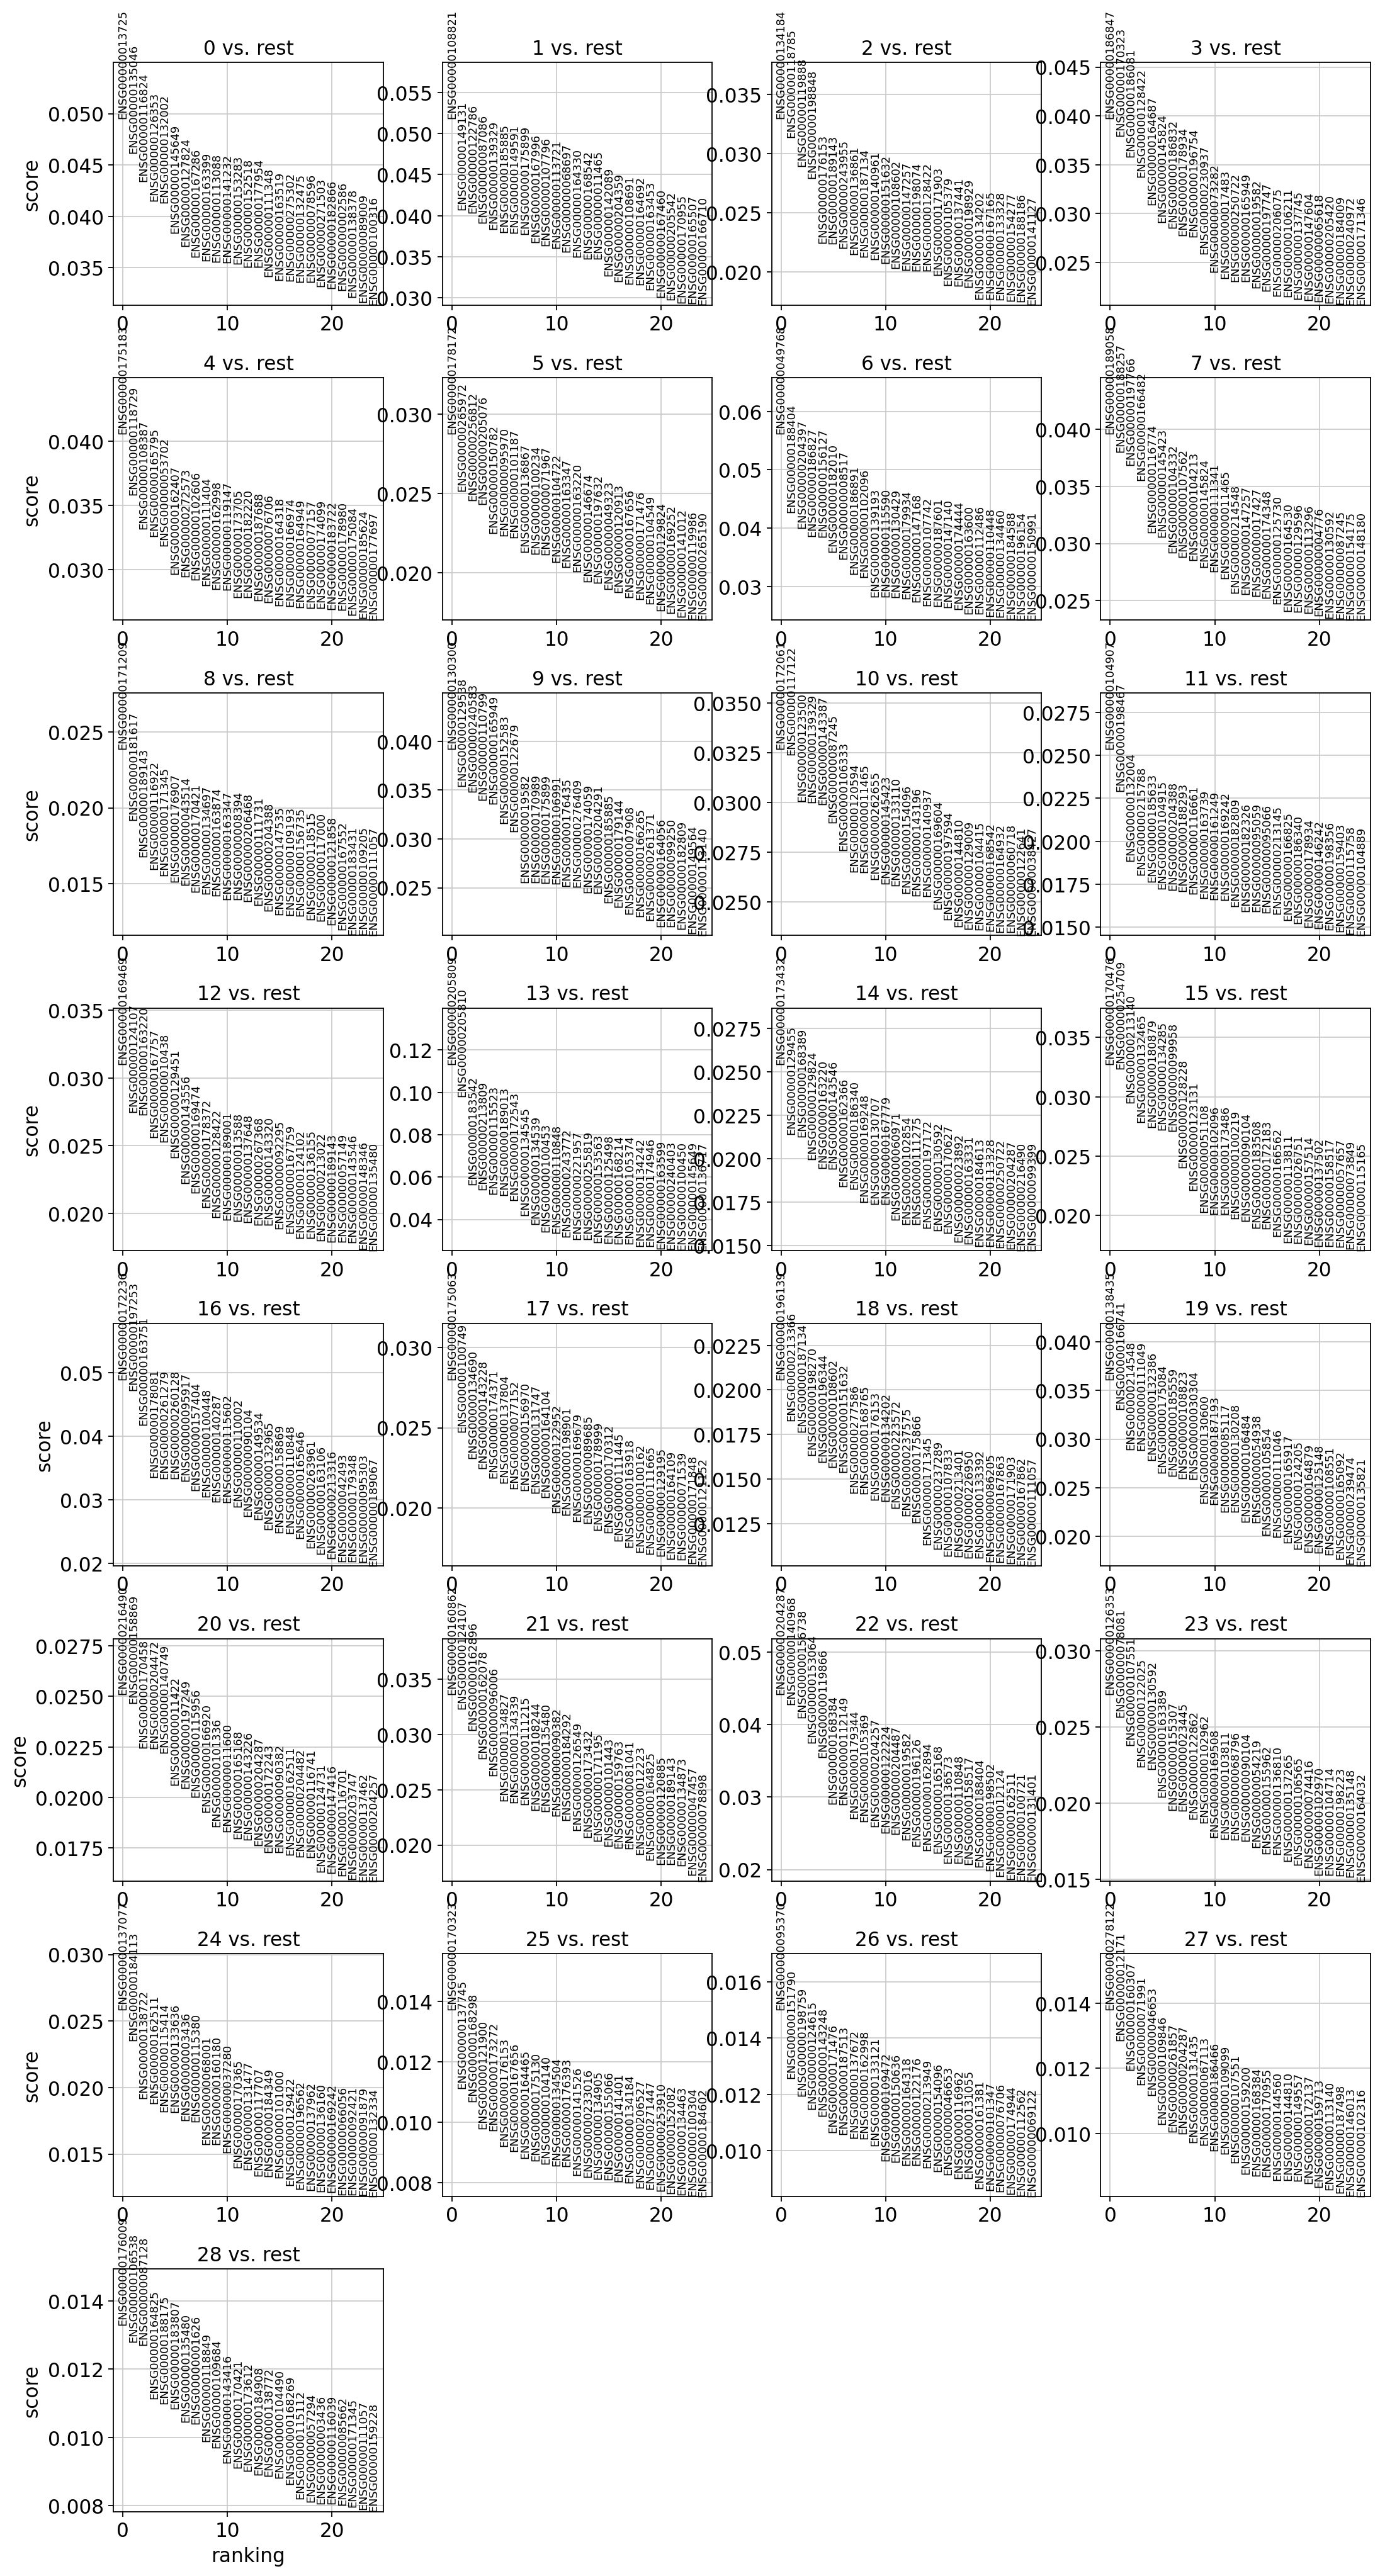

In [98]:
# multi-variate logistic regression 
sc.tl.rank_genes_groups(Puram_tpm_ann, 'leiden', method='logreg')
sc.pl.rank_genes_groups(Puram_tpm_ann, n_genes=25, sharey=False)

ranking genes
    finished (0:00:26)


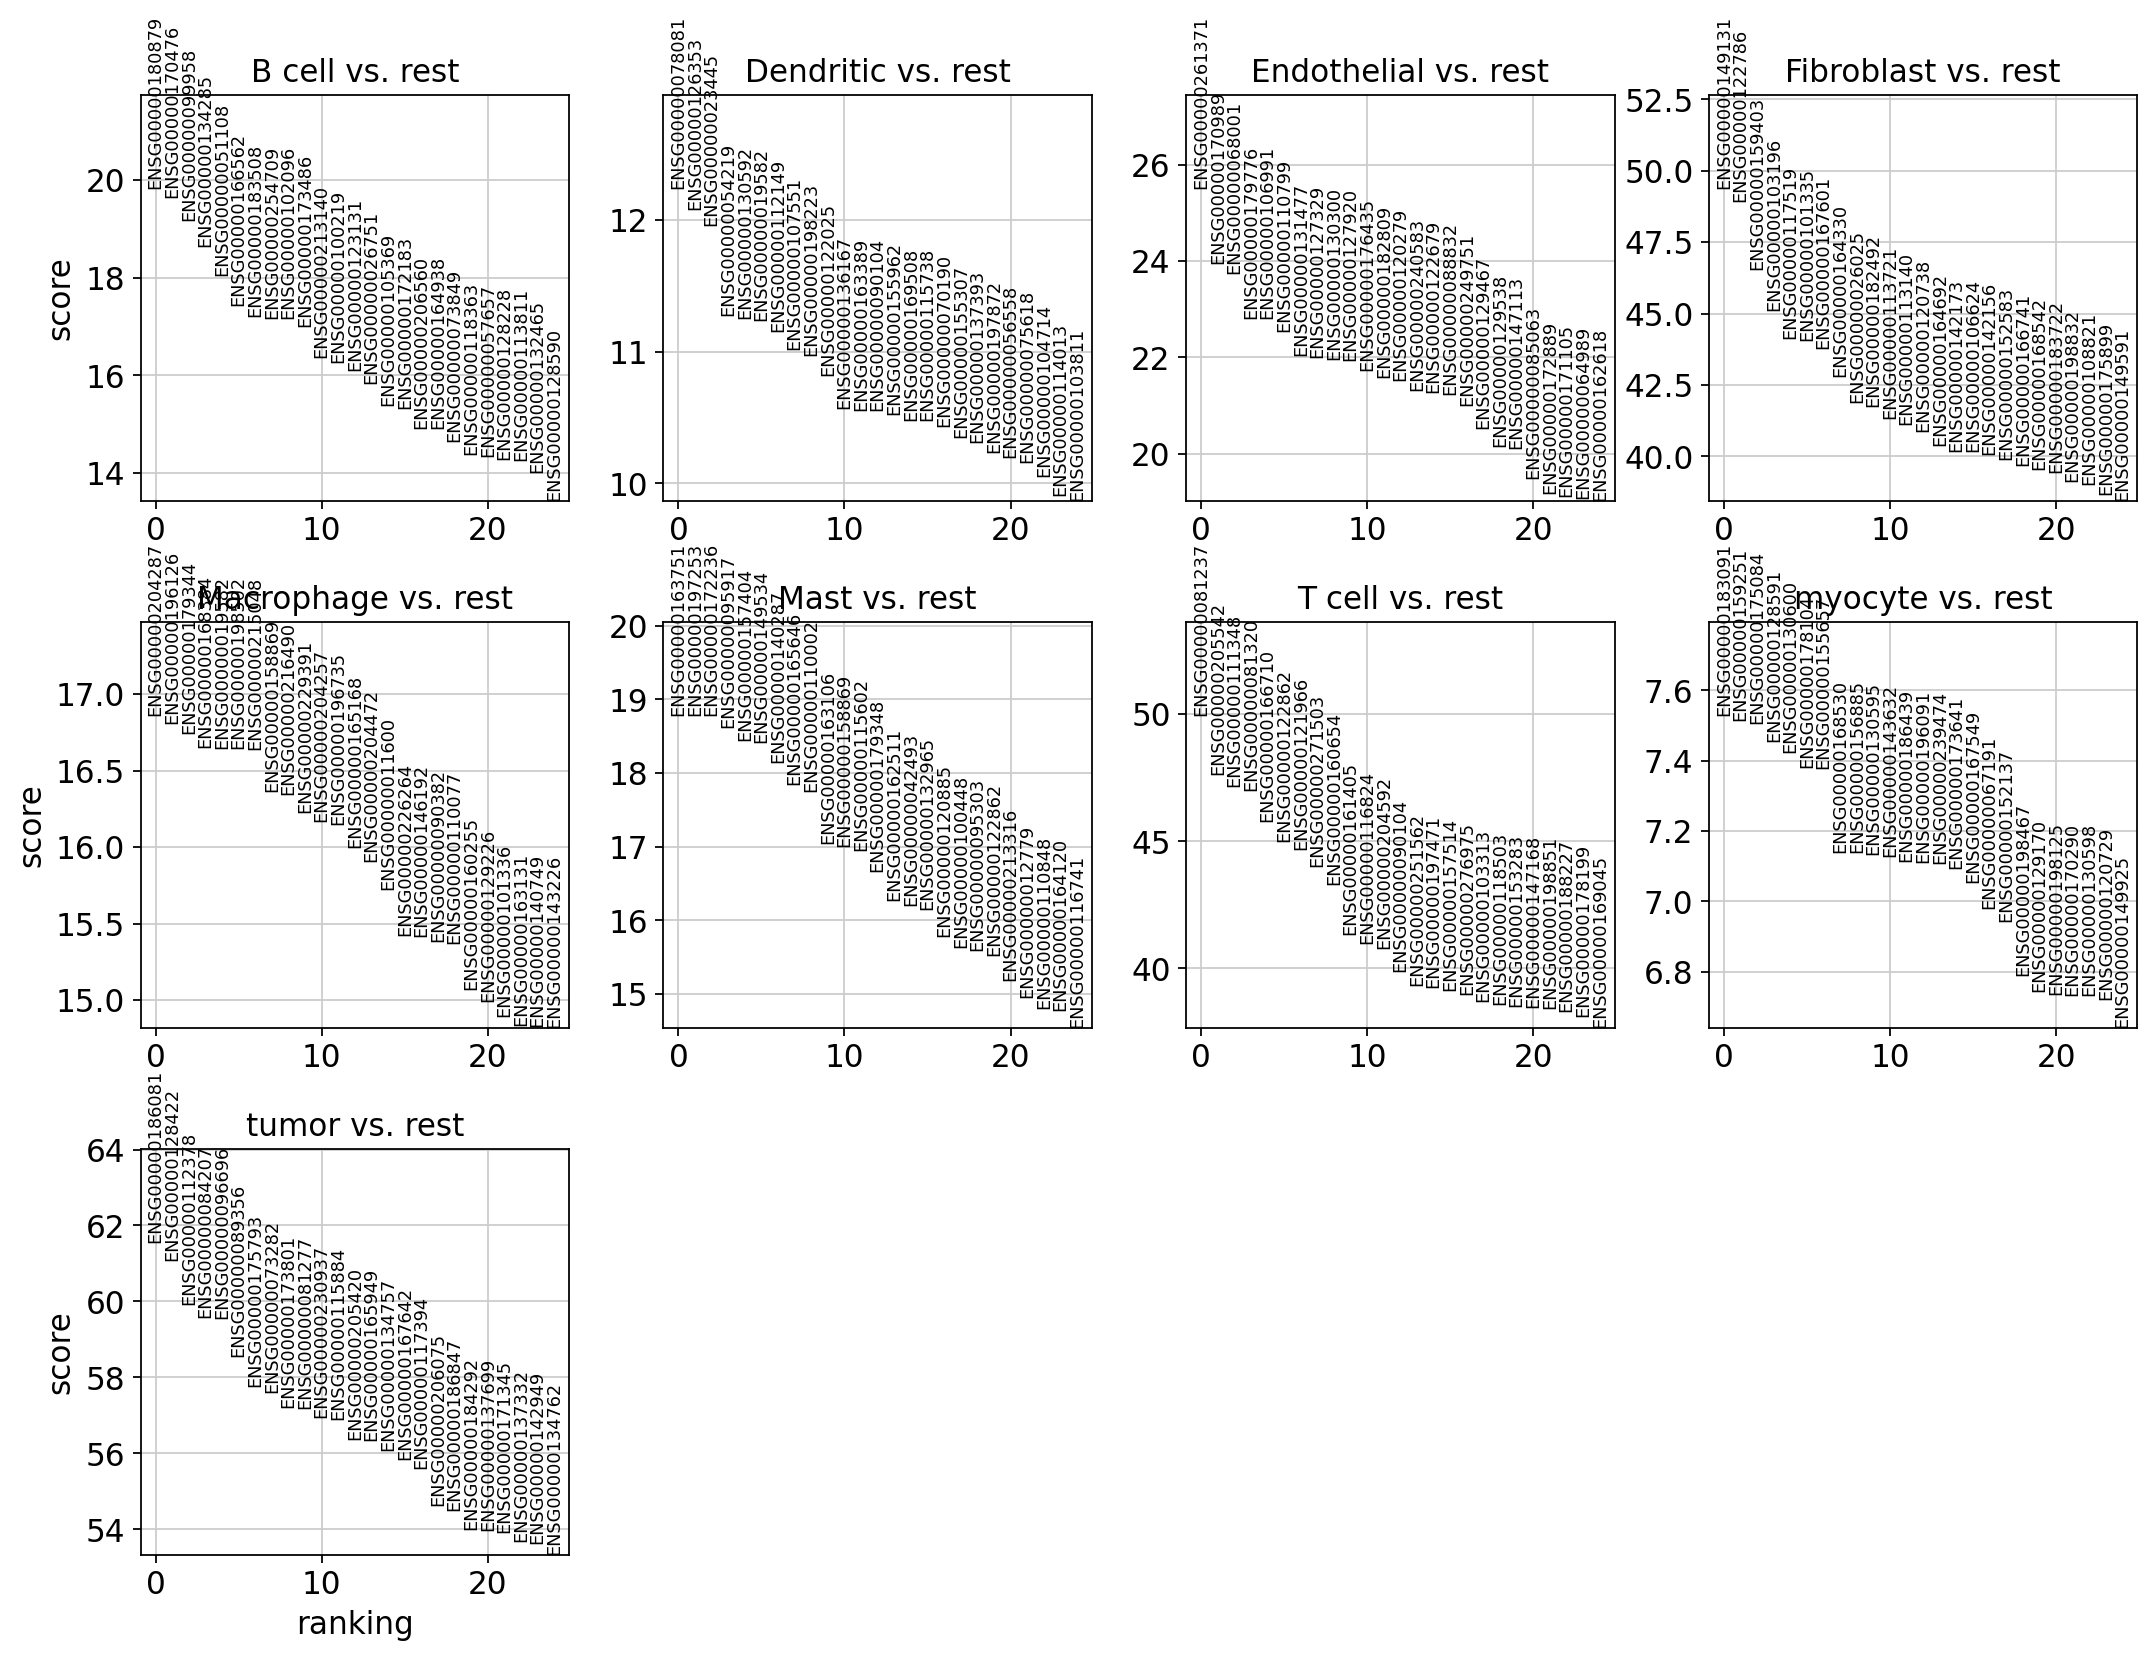

In [115]:
# wilcoxon rank-sum test result
# for cell types
sc.tl.rank_genes_groups(Puram_tpm_ann, 'Cell_type', method='wilcoxon')
sc.pl.rank_genes_groups(Puram_tpm_ann, n_genes=25, sharey=False)

In [126]:
pd.DataFrame(Puram_tpm_ann.uns['rank_genes_groups']['scores'])

B cell  Dendritic  Endothelial  Fibroblast  Macrophage       Mast  \
0      19.817747  12.233911    25.498501   49.367413   16.857662  18.775925   
1      19.637903  12.077790    23.948059   48.911243   16.806368  18.775383   
2      19.160500  11.954808    23.733635   46.535358   16.740995  18.774300   
3      18.626425  11.272343    22.804296   45.103657   16.648361  18.617138   
4      18.044956  11.247952    22.794542   44.106663   16.642384  18.435781   
...          ...        ...          ...         ...         ...        ...   
19888 -13.707830  -7.497961   -13.139280  -32.938850  -10.328046 -11.071353   
19889 -14.327265  -7.616362   -13.736150  -33.460304  -10.599341 -12.005581   
19890 -14.615192  -7.784987   -16.672308  -34.411507  -10.770679 -12.769575   
19891 -15.281869  -7.994799   -16.677166  -36.876591  -11.207932 -13.285201   
19892 -15.320442  -9.172451   -20.823740  -38.721062  -11.781012 -13.427369   

          T cell   myocyte      tumor  
0      49.936668  7.527729  61.544701  
1      47.599594  7.513703  61.065025  
2      47.136139  7.504128  59.920269  
3      46.987423  7.453287  59.563316  
4      45.758675  7.421595  59.537457  
...          ...       ...        ...  
19888 -43.646904 -5.751374 -38.070789  
19889 -44.636177 -5.899179 -38.823143  
19890 -45.013802 -6.193574 -39.335060  
19891 -45.101276 -6.446838 -40.146278  
19892 -47.470135 -6.609343 -47.851372  

[19893 rows x 9 columns]

In [122]:
# genes ranked by differential expression in each pre defined cell types, based on wilcoxon
# a table with the p-val scores and cell types.
result = Puram_tpm_ann.uns['rank_genes_groups']
groups = result['names'].dtype.names
DEGs_celltype_wilcoxon = pd.DataFrame(
    {group + '_' + key: result[key][group]
    for group in groups for key in ['names', 'pvals']})
DEGs_celltype_wilcoxon

B cell_names  B cell_pvals  Dendritic_names  Dendritic_pvals  \
0      ENSG00000180879  2.092702e-87  ENSG00000078081     2.048349e-34   
1      ENSG00000170476  7.336672e-86  ENSG00000126353     1.383897e-33   
2      ENSG00000099958  7.911162e-82  ENSG00000023445     6.127493e-33   
3      ENSG00000134285  1.962019e-77  ENSG00000054219     1.797239e-29   
4      ENSG00000051108  8.643313e-73  ENSG00000130592     2.370307e-29   
...                ...           ...              ...              ...   
19888  ENSG00000100345  9.114282e-43  ENSG00000010278     6.481822e-14   
19889  ENSG00000135046  1.478300e-46  ENSG00000160789     2.609259e-14   
19890  ENSG00000167996  2.247173e-48  ENSG00000126709     6.972043e-15   
19891  ENSG00000142089  1.010013e-52  ENSG00000142089     1.297859e-15   
19892  ENSG00000075624  5.583668e-53  ENSG00000185885     4.623833e-20   

      Endothelial_names  Endothelial_pvals Fibroblast_names  Fibroblast_pvals  \
0       ENSG00000261371      2.048198e-143  ENSG00000149131      0.000000e+00   
1       ENSG00000170989      9.680800e-127  ENSG00000122786      0.000000e+00   
2       ENSG00000068001      1.621583e-124  ENSG00000159403      0.000000e+00   
3       ENSG00000179776      4.156519e-115  ENSG00000103196      0.000000e+00   
4       ENSG00000106991      5.193844e-115  ENSG00000117519      0.000000e+00   
...                 ...                ...              ...               ...   
19888   ENSG00000141232       1.960822e-39  ENSG00000134757     6.110092e-238   
19889   ENSG00000143153       6.166903e-43  ENSG00000134762     1.822795e-245   
19890   ENSG00000167996       2.083914e-62  ENSG00000118640     1.696684e-259   
19891   ENSG00000108679       1.921204e-62  ENSG00000092820     1.096606e-297   
19892   ENSG00000026508       2.637739e-96  ENSG00000158769      0.000000e+00   

      Macrophage_names  Macrophage_pvals       Mast_names    Mast_pvals  \
0      ENSG00000204287      9.216352e-64  ENSG00000163751  1.188617e-78   
1      ENSG00000196126      2.191965e-63  ENSG00000197253  1.200793e-78   
2      ENSG00000179344      6.587731e-63  ENSG00000172236  1.225519e-78   
3      ENSG00000168384      3.110002e-62  ENSG00000095917  2.333542e-77   
4      ENSG00000019582      3.436629e-62  ENSG00000157404  6.783121e-76   
...                ...               ...              ...           ...   
19888  ENSG00000185885      5.262145e-25  ENSG00000117519  1.727724e-28   
19889  ENSG00000213853      3.000862e-26  ENSG00000150347  3.321247e-33   
19890  ENSG00000162458      4.734945e-27  ENSG00000085733  2.424752e-37   
19891  ENSG00000085733      3.728018e-29  ENSG00000090863  2.820990e-40   
19892  ENSG00000154380      4.890265e-32  ENSG00000182718  4.179986e-41   

          T cell_names  T cell_pvals    myocyte_names  myocyte_pvals  \
0      ENSG00000081237           0.0  ENSG00000183091   5.163059e-14   
1      ENSG00000205542           0.0  ENSG00000159251   5.747779e-14   
2      ENSG00000111348           0.0  ENSG00000175084   6.183871e-14   
3      ENSG00000081320           0.0  ENSG00000128591   9.104315e-14   
4      ENSG00000166710           0.0  ENSG00000130600   1.157182e-13   
...                ...           ...              ...            ...   
19888  ENSG00000010278           0.0  ENSG00000132475   8.852122e-09   
19889  ENSG00000106211           0.0  ENSG00000034510   3.653159e-09   
19890  ENSG00000101439           0.0  ENSG00000187514   5.881492e-10   
19891  ENSG00000085733           0.0  ENSG00000075624   1.142074e-10   
19892  ENSG00000142089           0.0  ENSG00000205542   3.860299e-11   

           tumor_names  tumor_pvals  
0      ENSG00000186081          0.0  
1      ENSG00000128422          0.0  
2      ENSG00000112378          0.0  
3      ENSG00000084207          0.0  
4      ENSG00000096696          0.0  
...                ...          ...  
19888  ENSG00000197471          0.0  
19889  ENSG00000026025          0.0  
19890  ENSG00000166710          0.0  
19

In [190]:
# extract top 100 DEGs from each cell types
marker_genes = pd.DataFrame()
for col,gene in DEGs_celltype_wilcoxon[0:100].iteritems():
    if 'names' in col:
        marker_genes = pd.concat([marker_genes,gene],axis=1)
        print('detected all',len(gene),' top DEGs in ',col)

detected all 100  top DEGs in  B cell_names
detected all 100  top DEGs in  Dendritic_names
detected all 100  top DEGs in  Endothelial_names
detected all 100  top DEGs in  Fibroblast_names
detected all 100  top DEGs in  Macrophage_names
detected all 100  top DEGs in  Mast_names
detected all 100  top DEGs in  T cell_names
detected all 100  top DEGs in  myocyte_names
detected all 100  top DEGs in  tumor_names


In [191]:
marker_genes

B cell_names  Dendritic_names Endothelial_names Fibroblast_names  \
0   ENSG00000180879  ENSG00000078081   ENSG00000261371  ENSG00000149131   
1   ENSG00000170476  ENSG00000126353   ENSG00000170989  ENSG00000122786   
2   ENSG00000099958  ENSG00000023445   ENSG00000068001  ENSG00000159403   
3   ENSG00000134285  ENSG00000054219   ENSG00000179776  ENSG00000103196   
4   ENSG00000051108  ENSG00000130592   ENSG00000106991  ENSG00000117519   
..              ...              ...               ...              ...   
95  ENSG00000152256  ENSG00000101336   ENSG00000150687  ENSG00000179820   
96  ENSG00000133874  ENSG00000213145   ENSG00000164056  ENSG00000188783   
97  ENSG00000048462  ENSG00000136003   ENSG00000156298  ENSG00000177469   
98  ENSG00000124256  ENSG00000138166   ENSG00000103966  ENSG00000003436   
99  ENSG00000076662  ENSG00000011600   ENSG00000074660  ENSG00000108551   

   Macrophage_names       Mast_names     T cell_names    myocyte_names  \
0   ENSG00000204287  ENSG00000163751  ENSG00000081237  ENSG00000183091   
1   ENSG00000196126  ENSG00000197253  ENSG00000205542  ENSG00000159251   
2   ENSG00000179344  ENSG00000172236  ENSG00000111348  ENSG00000175084   
3   ENSG00000168384  ENSG00000095917  ENSG00000081320  ENSG00000128591   
4   ENSG00000019582  ENSG00000157404  ENSG00000166710  ENSG00000130600   
..              ...              ...              ...              ...   
95  ENSG00000177885  ENSG00000026025  ENSG00000116771  ENSG00000146147   
96  ENSG00000189067  ENSG00000100599  ENSG00000180448  ENSG00000164708   
97  ENSG00000147416  ENSG00000115648  ENSG00000121351  ENSG00000064042   
98  ENSG00000086730  ENSG00000169554  ENSG00000179841  ENSG00000140416   
99  ENSG00000173391  ENSG00000138395  ENSG00000130517  ENSG00000004776   

        tumor_names  
0   ENSG00000186081  
1   ENSG00000128422  
2   ENSG00000112378  
3   ENSG00000084207  
4   ENSG00000096696  
..              ...  
95  ENSG00000237945  
96  ENSG00000264230  
97  ENSG00000145592  
98  ENSG00000185479  
99  ENSG00000196262  

[100 rows x 9 columns]

In [192]:
marker_genes.to_csv("./Puram/top100DEGs.csv")

In [181]:
# writing a list of all DEGs
# import csv
# with open("./Puram/top100DEGs.txt",'w') as f:
#     write = csv.writer(f)
#     write.writerow(marker_genes)

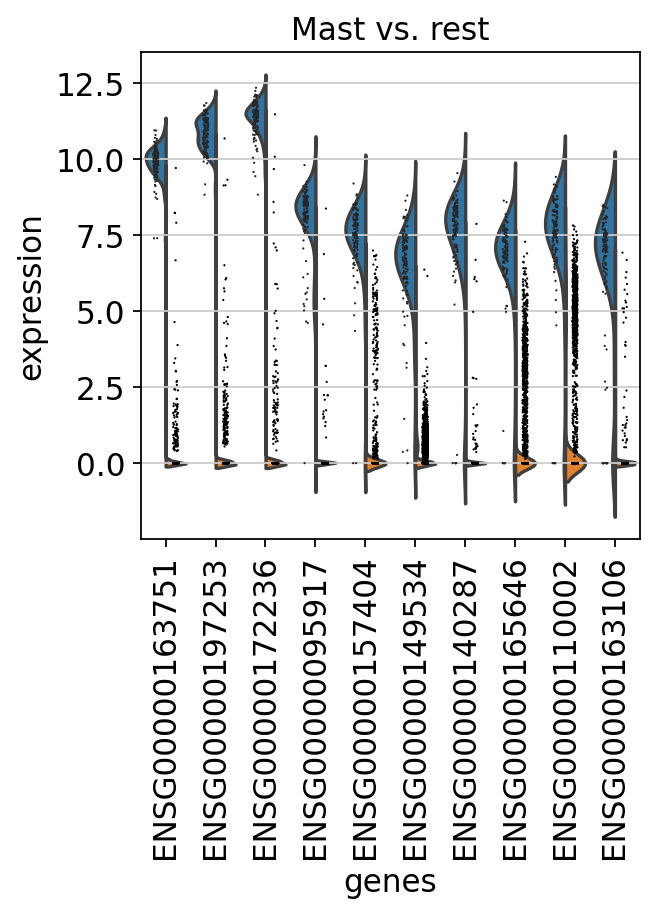

In [133]:
# a more detailed of DEGs look into certain group
sc.pl.rank_genes_groups_violin(Puram_tpm_ann, groups='Mast', n_genes=10)

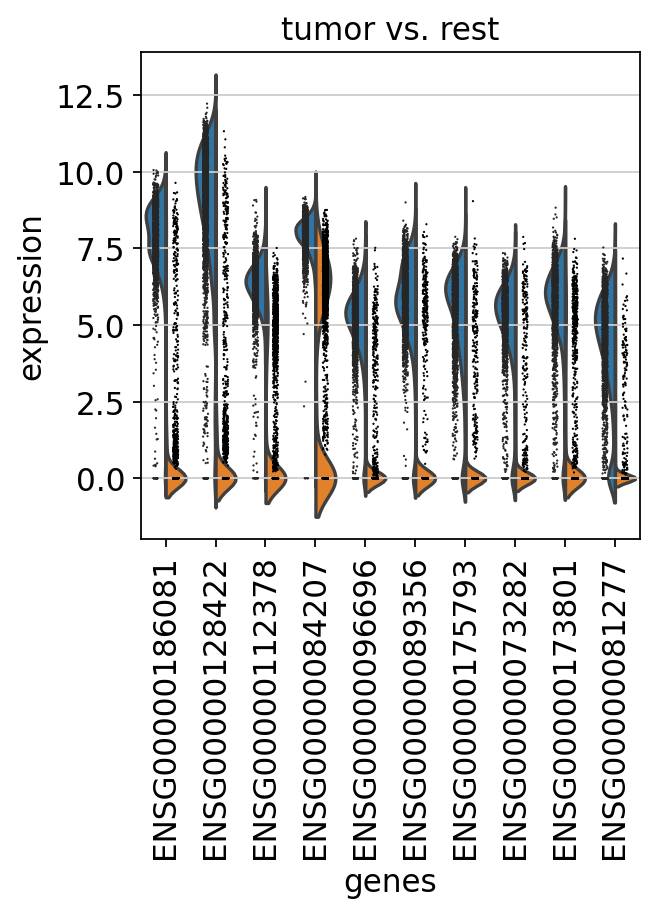

In [131]:
# a more detailed of DEGs look into certain group
sc.pl.rank_genes_groups_violin(Puram_tpm_ann, groups='tumor', n_genes=10)

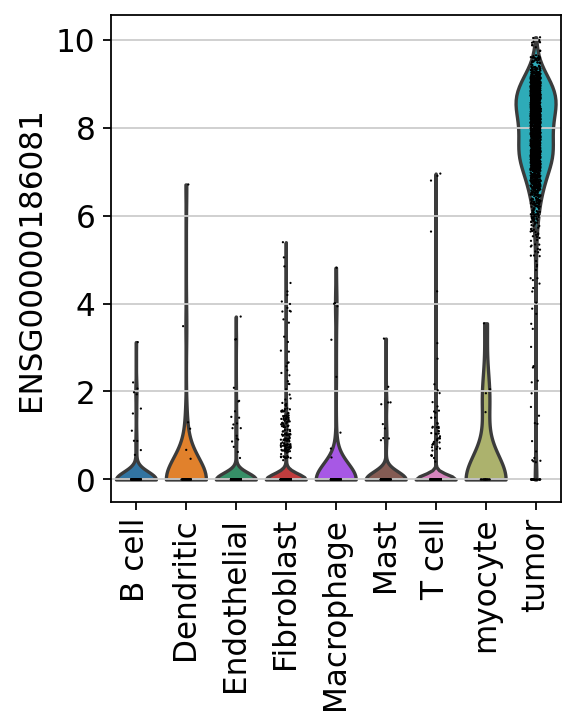

In [142]:
# compare a certain gene across groups
# the gene here is the most DEG in tumor
sc.pl.violin(Puram_tpm_ann, ['ENSG00000186081'], groupby='Cell_type',rotation=90)

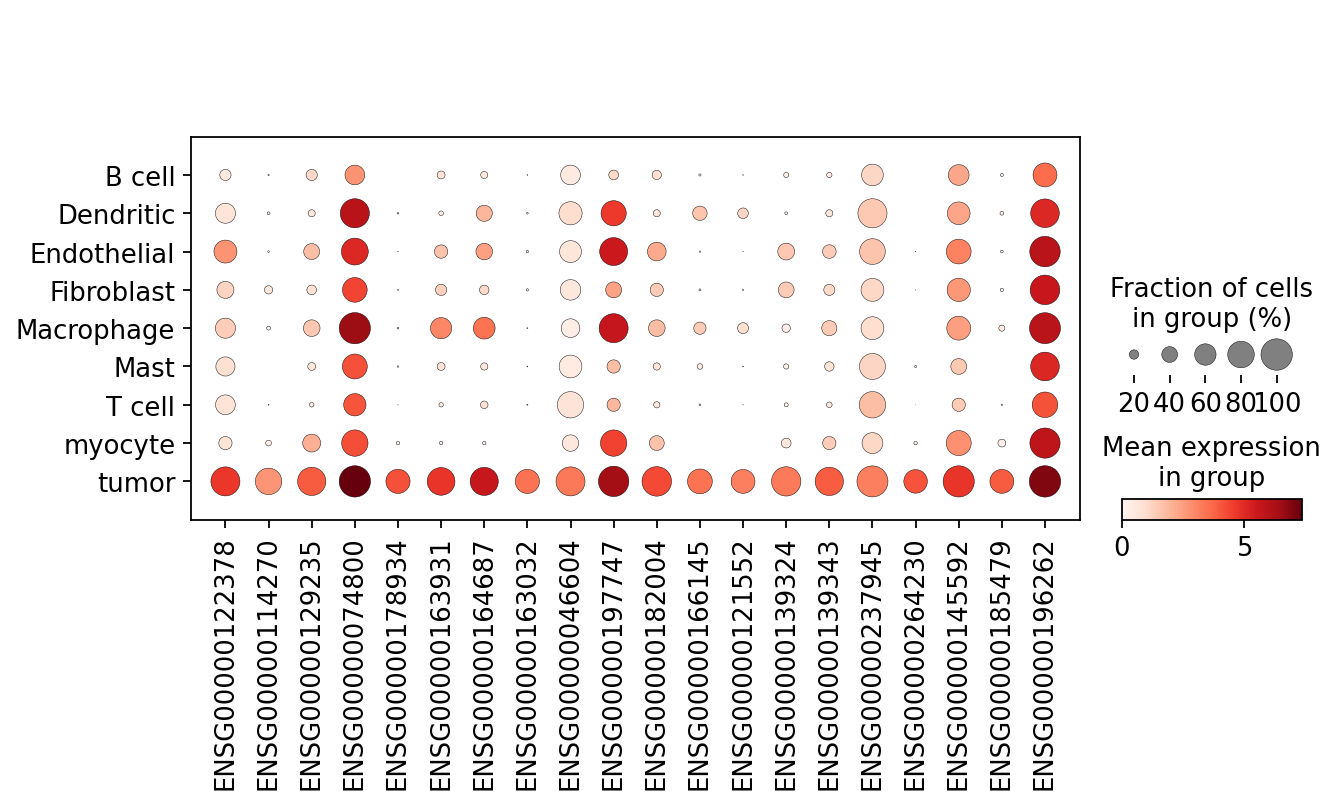

In [167]:
# visualize marker genes
# 20 DEGs from tumor
sc.pl.dotplot(Puram_tpm_ann, marker_genes[-20:], groupby='Cell_type')

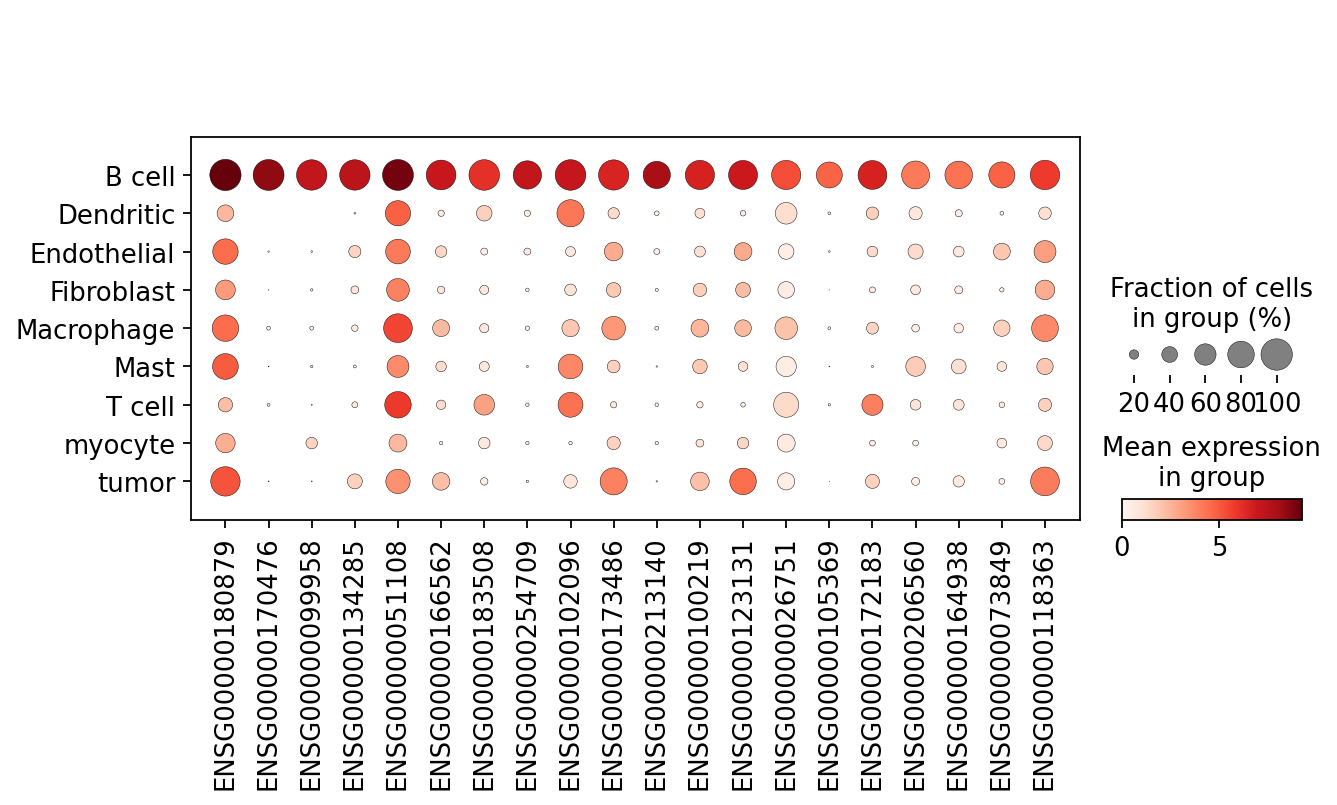

In [168]:
# visualize marker genes
# 20 DEGs from B cell
sc.pl.dotplot(Puram_tpm_ann, marker_genes[:20], groupby='Cell_type')

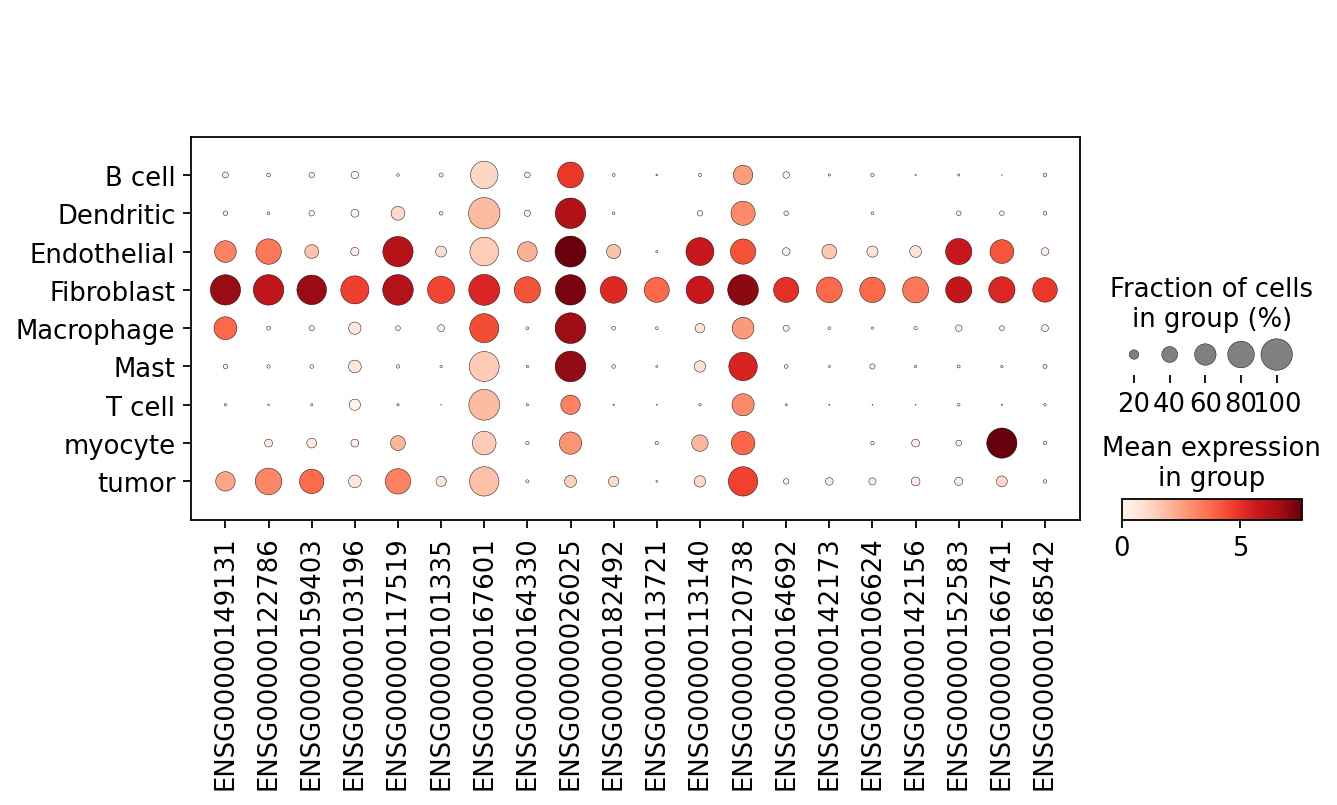

In [170]:
# visualize marker genes
# 20 DEGs from Fibroblast
sc.pl.dotplot(Puram_tpm_ann, marker_genes[300:320], groupby='Cell_type')

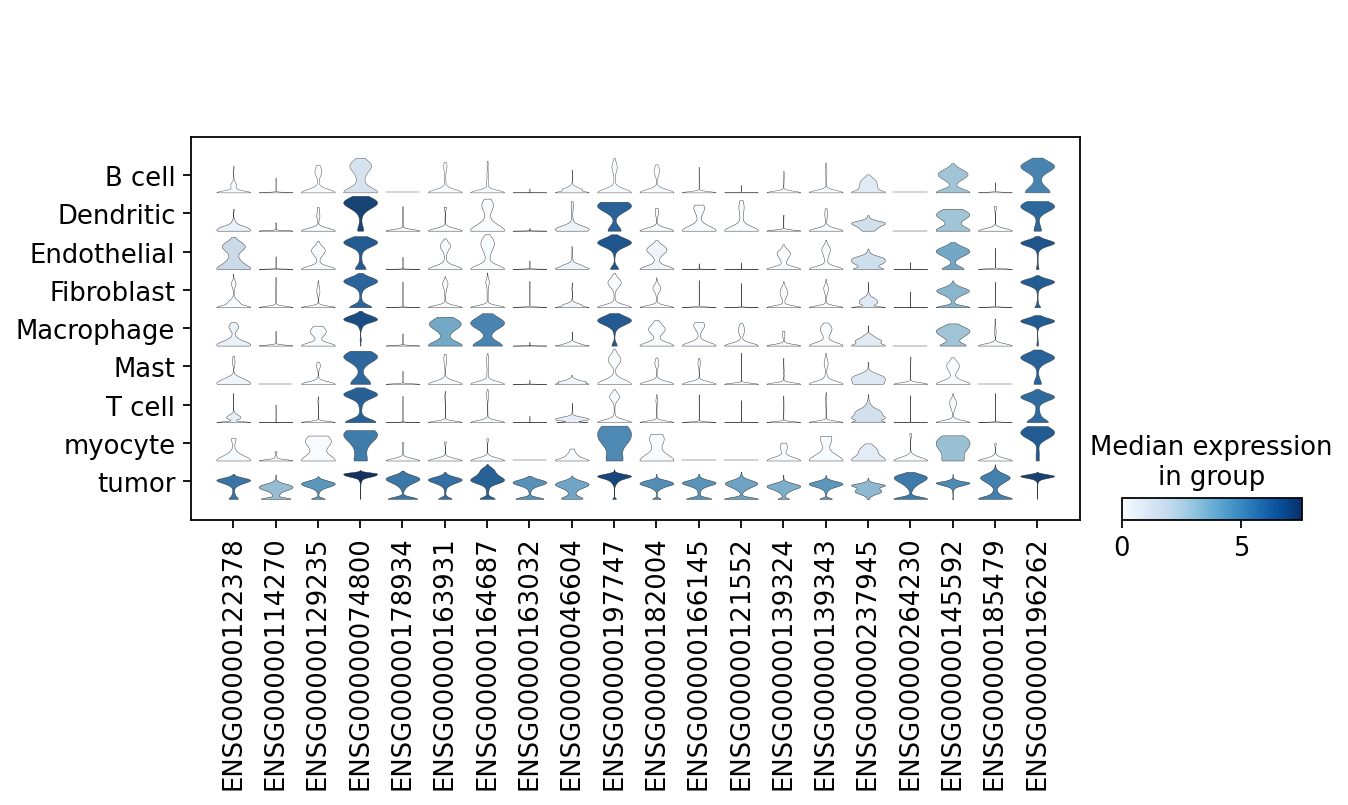

In [171]:
# tumor 20 DEGs in violin plot
sc.pl.stacked_violin(Puram_tpm_ann, marker_genes[-20:], groupby='Cell_type', rotation=90);

In [135]:
?sc.pl.violin

In [193]:
Puram_tpm_ann.write(results_file)
Puram_tpm_ann

AnnData object with n_obs × n_vars = 5902 × 3865
    obs: 'Cell_type', 'n_genes', 'leiden'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'Cell_type_colors', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'umap', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [206]:
# log(countTPM+1) and scaled each gene to unit variance. Clip values exceeding standard deviation 10.
Puram_tpm_ann.to_df()

ENSG00000245105  ENSG00000166535  ENSG00000256069  \
HN28_P15_D06_S330_comb            1.343045        -0.339845        -0.051614   
HN28_P6_G05_S173_comb            -0.146207        -0.339845        -0.051614   
HN26_P14_D11_S239_comb           -0.146207         5.022391        -0.051614   
HN26_P14_H05_S281_comb           -0.146207        -0.339845        -0.051614   
HN26_P25_H09_S189_comb           -0.146207        -0.339845        -0.051614   
...                                    ...              ...              ...   
HNSCC17_P4_G12_S180_comb         -0.146207        -0.339845        -0.051614   
HNSCC20_P13_C05_S221_comb        -0.146207        -0.339845        -0.051614   
HNSCC17_P4_C12_S132_comb         -0.146207        -0.088442        -0.051614   
HNSCC20_P3_H08_S92_comb          -0.146207        -0.339845        -0.051614   
HNSCC20_P3_G06_S78_comb          -0.146207         4.043777        -0.051614   

                           ENSG00000114771  ENSG00000197953  ENSG00000085563  \
HN28_P15_D06_S330_comb           -0.080686        -0.065879        -0.160378   
HN28_P6_G05_S173_comb            -0.080686        -0.065879        -0.160378   
HN26_P14_D11_S239_comb           -0.080686        -0.065879        -0.160378   
HN26_P14_H05_S281_comb           -0.080686        -0.065879        -0.160378   
HN26_P25_H09_S189_comb           -0.080686        -0.065879        -0.160378   
...                                    ...              ...              ...   
HNSCC17_P4_G12_S180_comb         -0.080686        -0.065879        -0.160378   
HNSCC20_P13_C05_S221_comb        -0.080686        -0.065879        -0.160378   
HNSCC17_P4_C12_S132_comb         -0.080686        -0.065879        -0.160378   
HNSCC20_P3_H08_S92_comb          -0.080686        -0.065879        -0.160378   
HNSCC20_P3_G06_S78_comb          -0.080686        -0.065879        -0.160378   

                           ENSG00000005471  ENSG00000023839  ENSG00000091262  \
HN28_P15_D06_S330_comb           -0.090398        -0.256606        10.000000   
HN28_P6_G05_S173_comb            -0.090398        -0.256606        -0.149364   
HN26_P14_D11_S239_comb           -0.090398        -0.256606        -0.149364   
HN26_P14_H05_S281_comb           -0.090398        -0.256606        -0.149364   
HN26_P25_H09_S189_comb           -0.090398        -0.256606         0.401055   
...                                    ...              ...              ...   
HNSCC17_P4_G12_S180_comb         -0.090398        -0.256606        -0.149364   
HNSCC20_P13_C05_S221_comb        -0.090398         3.114681        10.000000   
HNSCC17_P4_C12_S132_comb         -0.090398        -0.256606        -0.149364   
HNSCC20_P3_H08_S92_comb          -0.090398         2.538895        -0.149364   
HNSCC20_P3_G06_S78_comb          -0.090398         2.860172        -0.149364   

                           ENSG00000256340  ...  ENSG00000169249  \
HN28_P15_D06_S330_comb            5.167463  ...        -0.343677   
HN28_P6_G05_S173_comb            -0.043037  ...        -0.343677   
HN26_P14_D11_S239_comb           -0.043037  ...         0.061421   
HN26_P14_H05_S281_comb           -0.043037  ...        -0.343677   
HN26_P25_H09_S189_comb           -0.043037  ...        -0.343677   
...                                    ...  ...              ...   
HNSCC17_P4_G12_S180_comb         -0.043037  ...        -0.343677   
HNSCC20_P13_C05_S221_comb        -0.043037  ...         3.861310   
HNSCC17_P4_C12_S132_comb         -0.043037  ...        -0.343677   
HNSCC20_P3_H08_S92_comb          -0.043037  ...        -0.343677   
HNSCC20_P3_G06_S78_comb          -0.043037  ...        -0.343677   

                           ENSG00000152467  ENSG00000196812  ENSG00000121903  \
HN28_P15_D06_S330_comb           -0.038372        -0.197991        -0.130158   
HN28_P6_G05_S173_comb            -0.038372        -0.197991        -0.130158   
HN26_P14_D11_S239_comb           -0.038372        -0.197991        -0.130158   
HN26_P1